In [16]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np

from numpy.random import choice, normal
import matplotlib.pyplot as plt

from astropy.timeseries import LombScargle

from local_utils import *

# WS_file = '/Users/brian/Documents/research/Active Projects/Measuring_Wind_with_Ingenuity/code/WE__0133___________DER_WS__________________P01.xml'
which_sol = "0091"
path = '/Users/brian/Documents/research/Active Projects/Measuring_Wind_with_Ingenuity/code/MEDA_WS_Data/'
WS_file = path + 'WE__%s___________DER_WS__________________P02.xml' % (which_sol)

# time, wind = retrieve_time_wind(WS_file)

path = '/Users/brian/Documents/research/Active Projects/Measuring_Wind_with_Ingenuity/code/MEDA_WS_Data/'
WS_file = path + 'WE__%s___________DER_WS__________________P02.xml' % (which_sol)

# time, wind = retrieve_time_wind(WS_file, start_time=None, end_time=None)

# Convert to float array
time_array = np.array([time[i].hour*3600. + time[i].minute*60 + time[i].microsecond/1e6
                       for i in range(len(time))])
print(time_array[1] - time_array[0])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0.487000000000009


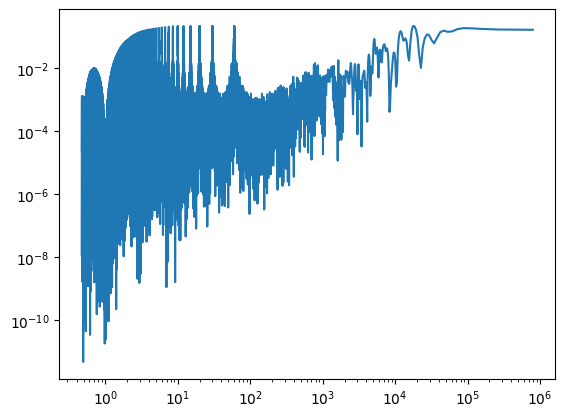

In [19]:
# When during the day should you fly?
# In terms of times after sunrise, probably between 6 and 9am.

frequency, power = LombScargle(time_array, wind).autopower()
plt.loglog(1./frequency, power)